## 2. Data Exploration and Preprocessing
#### **Task 1:** Data Exploration

Notebook: notebooks/EDA.ipynb
Steps:
- Load the dataset.
- Explore the data structure, types, and summary statistics.
- Visualize relationships between features and the target variable.
- Identify missing values and outliers.

In [4]:
# Import necessary libraries

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib.inline


UsageError: Line magic function `%matplotlib.inline` not found.


Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None

Summary Statistics:
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  501.000000   
mean     3.613524   11.363636  

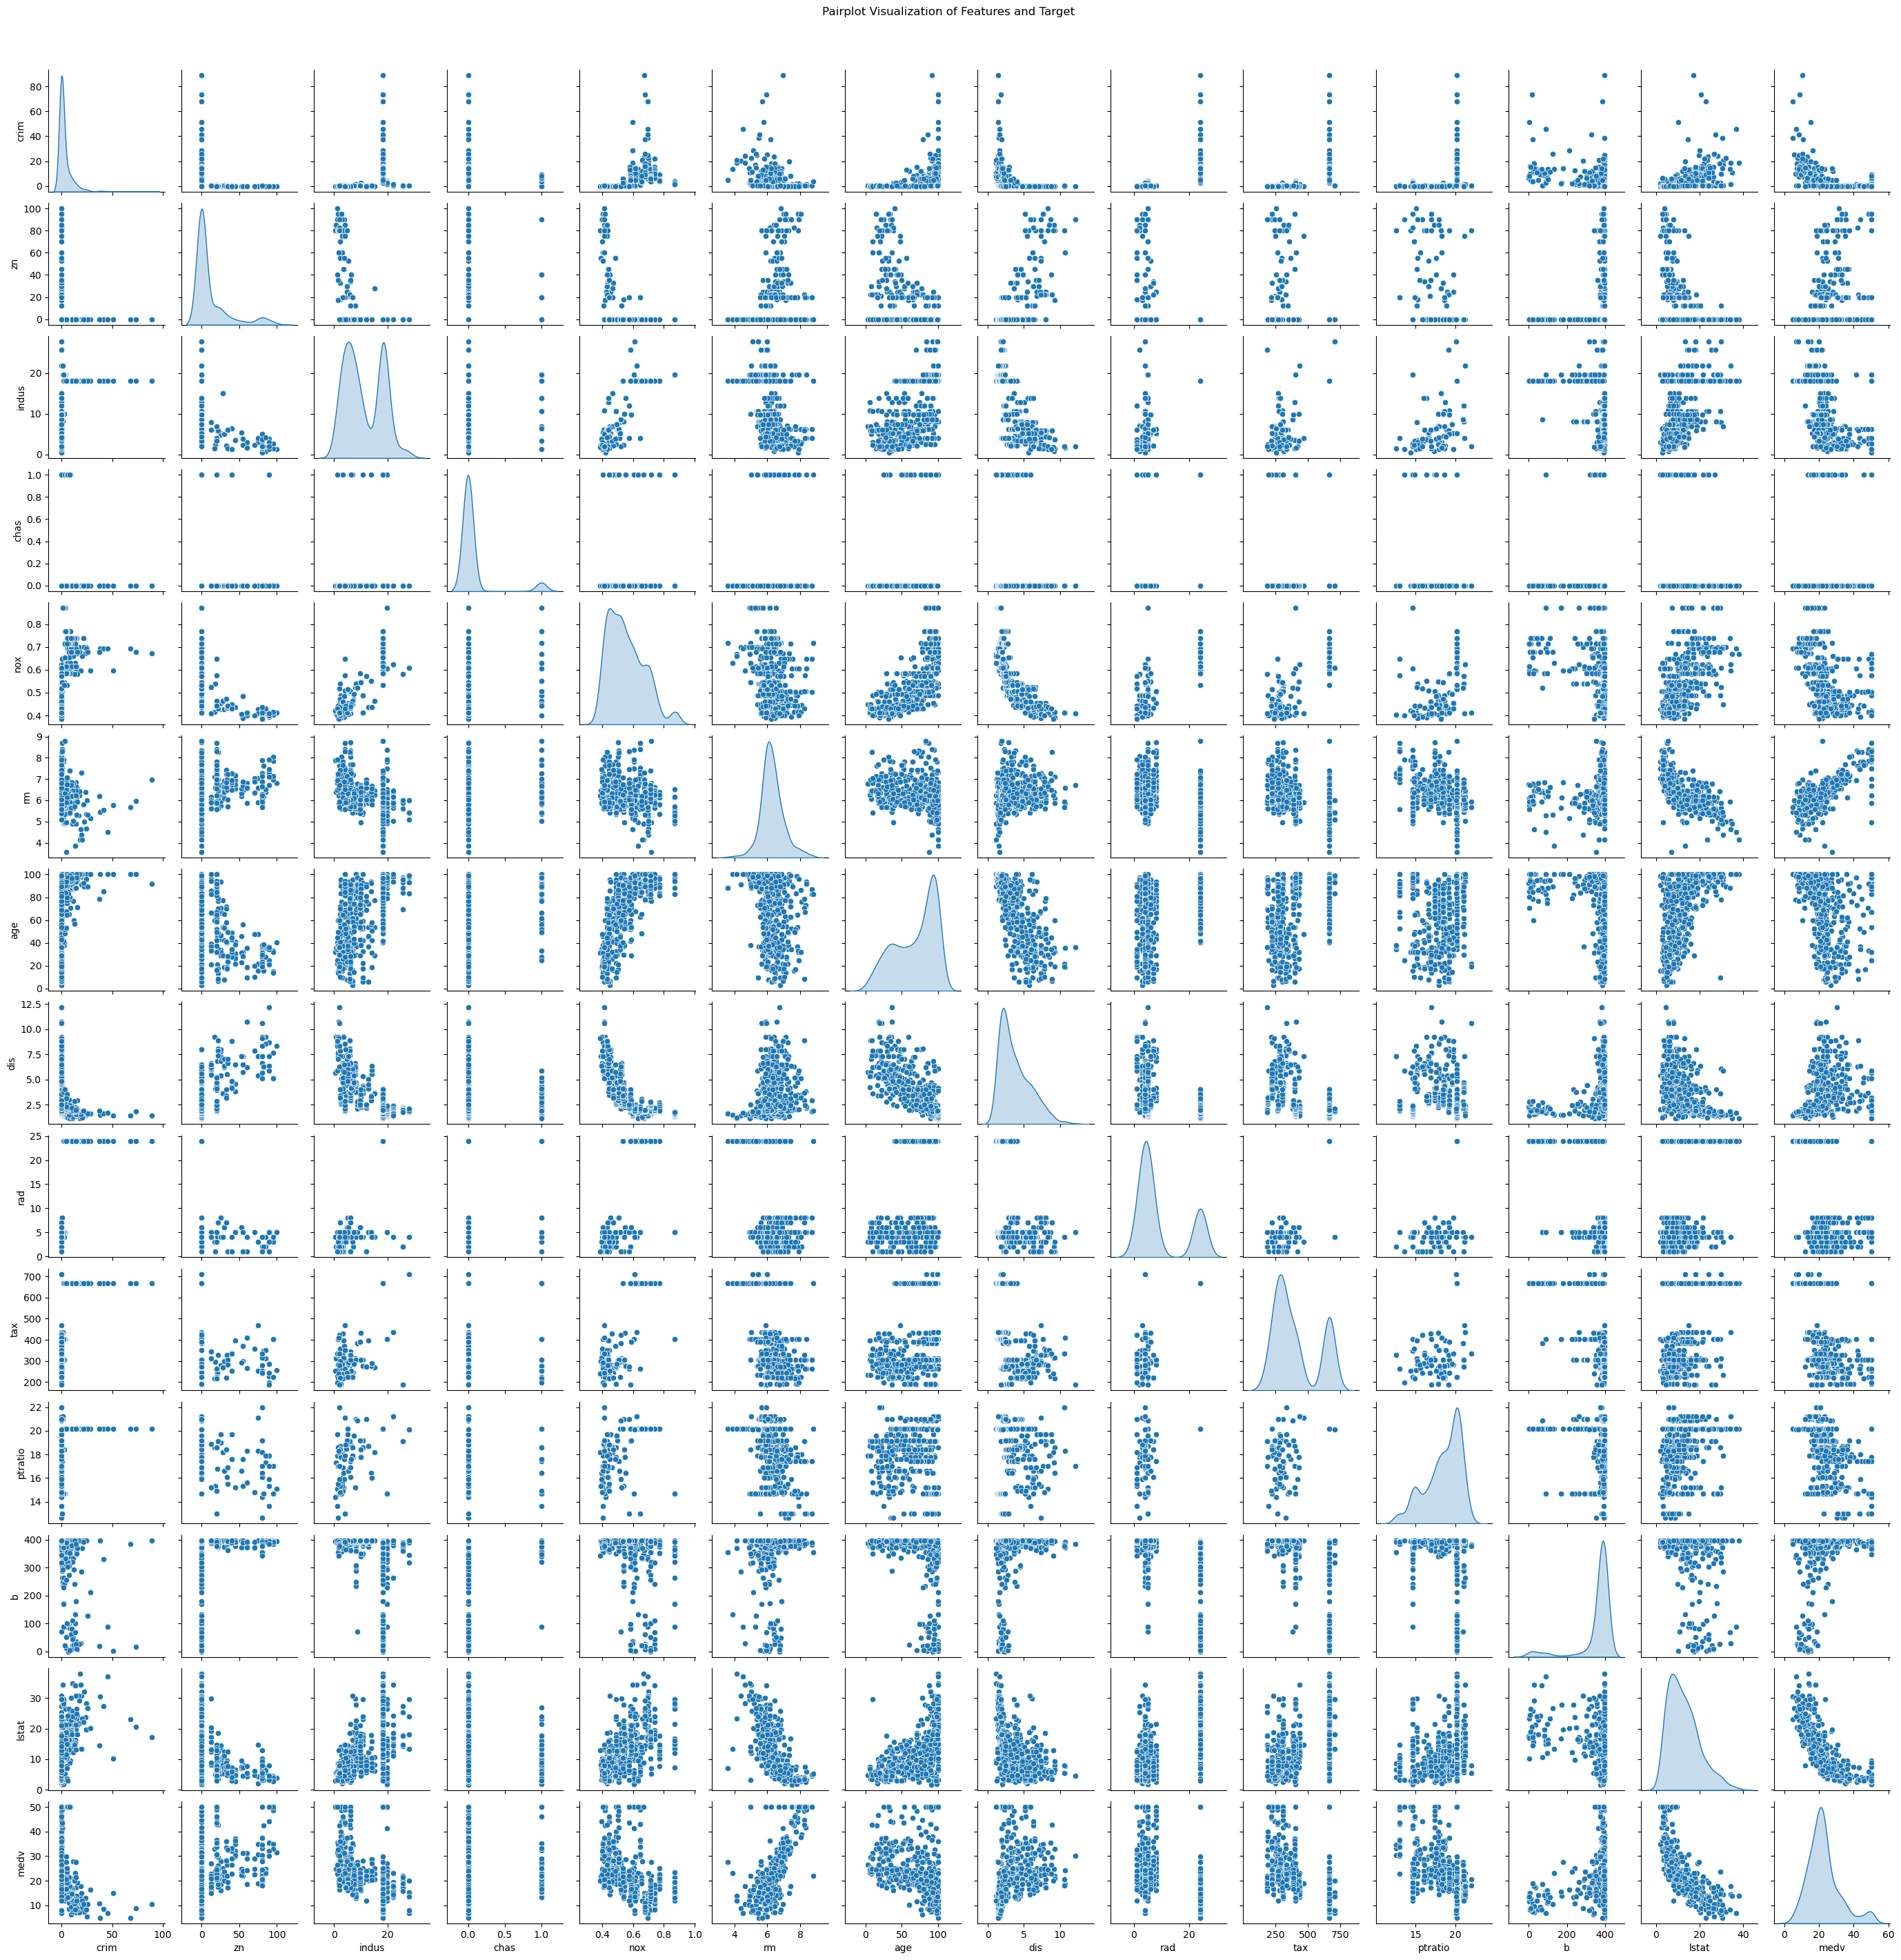

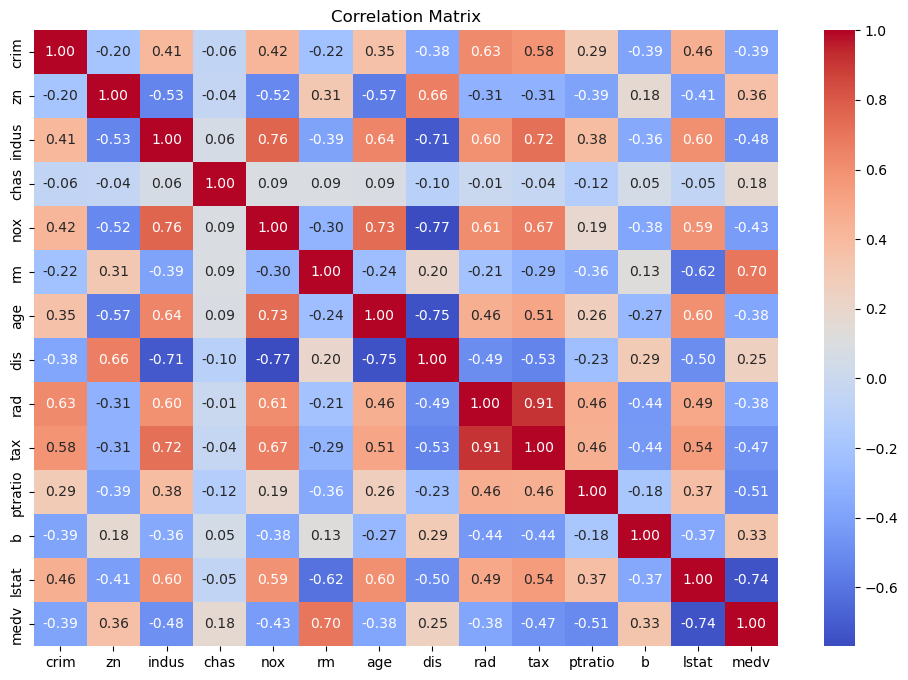

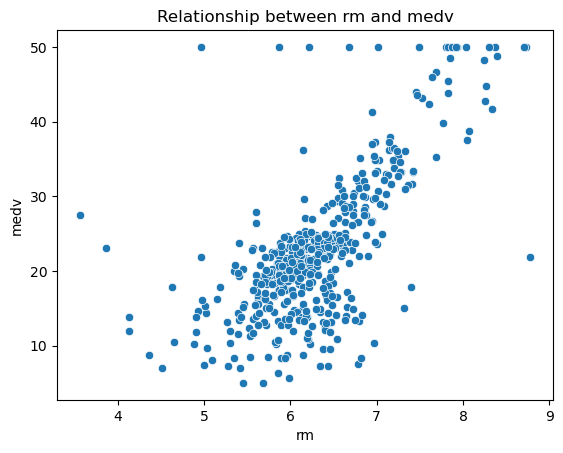

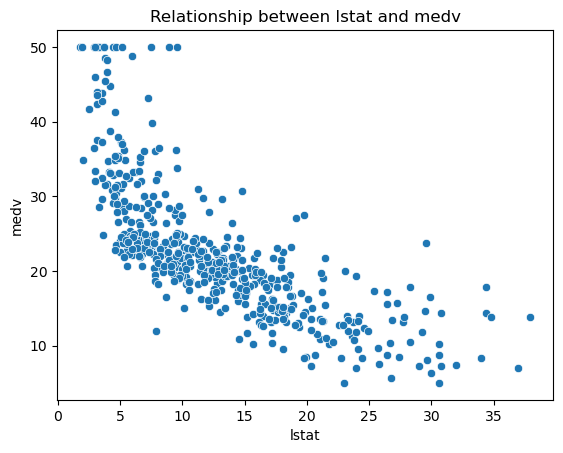

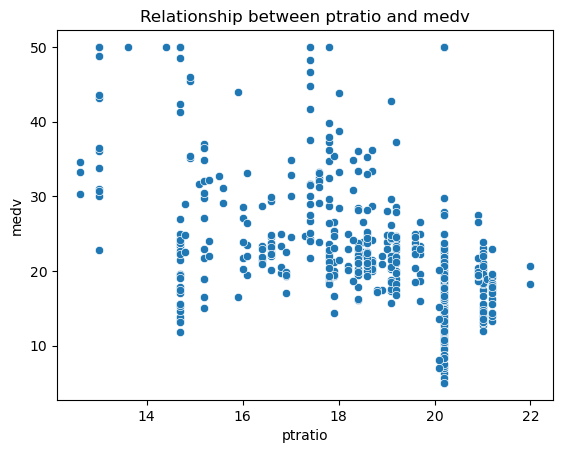


Missing Values:
rm    5
dtype: int64

Identifying Outliers:
crim - Outliers detected: 66
zn - Outliers detected: 68
indus - Outliers detected: 0
chas - Outliers detected: 35
nox - Outliers detected: 0
rm - Outliers detected: 30
age - Outliers detected: 0
dis - Outliers detected: 5
rad - Outliers detected: 0
tax - Outliers detected: 0
ptratio - Outliers detected: 15
b - Outliers detected: 77
lstat - Outliers detected: 7


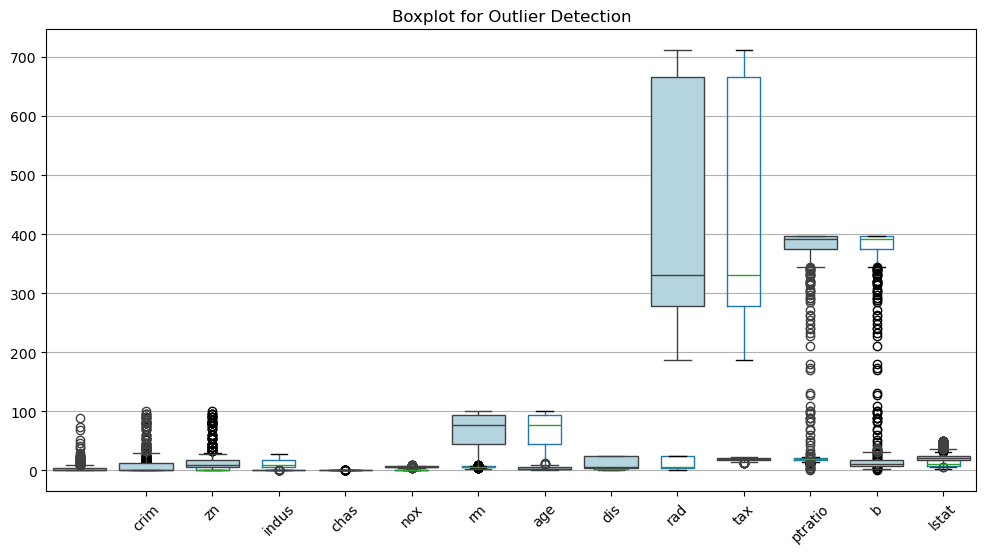

In [ ]:
# Load the dataset
file_path = '../data/BostonHousing.csv'
data = pd.read_csv(file_path)

# Explore the data structure, types, and summary statistics
print("Data Structure:")
print(data.info())  # Overview of the dataset's structure and types

print("\nSummary Statistics:")
print(data.describe())  # Summary statistics for numerical columns

# Check for unique values and any categorical data
print("\nUnique values in each column:")
for col in data.columns:
    print(f"{col}: {data[col].nunique()} unique values")

# Visualize relationships between features and the target variable
target = 'medv'  # Median value of owner-occupied homes
features = [col for col in data.columns if col != target]

print("\nVisualizing relationships:")
# Pairplot visualization of features vs. target
sns.pairplot(data, vars=features + [target], diag_kind='kde', markers='o', height=2)
plt.suptitle("Pairplot Visualization of Features and Target", y=1.02)
plt.show()

# Correlation heatmap to examine relationships
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Scatter plots for features with strongest correlation to target
for feature in ['rm', 'lstat', 'ptratio']:  # Commonly correlated features
    plt.figure()
    sns.scatterplot(x=data[feature], y=data[target])
    plt.title(f"Relationship between {feature} and {target}")
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

# Identify missing values and outliers
print("\nMissing Values:")
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])  # Print columns with missing 
print("\nIdentifying Outliers:")
# Example: Using the IQR method to detect outliers
for col in features:
    if pd.api.types.is_numeric_dtype(data[col]):
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        print(f"{col} - Outliers detected: {len(outliers)}")

# Visualize outliers using boxplot
plt.figure(figsize=(12, 6))
data.boxplot(rot=45)
sns.boxplot(data, color="lightblue")
plt.title("Boxplot for Outlier Detection")
plt.show()